# Analyzing mobile apps data 
This project is created in order to analyze mobile apps data to determine what apps generate best resoults from in app adds

### FUNCTIONS USEED 

In [1]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

Getting the data

In [2]:

from csv import reader
opened_file = open('AppleStore.csv',encoding="utf")
read_file = reader(opened_file)
ios = list(read_file)

ios_header = ios[0]
ios_data=ios[1:]

opened_file = open('googleplaystore.csv',encoding="utf")
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android_data=android[1:]




Exploring initial data

In [3]:
print(android_header)
explore_data(android_data,0,3,True)
print(ios_header)
explore_data(ios_data,0,3,True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['284882215', '

Cleaning data deleting row 10472 cause it has mistakes

In [4]:
print(android_data[10472])
android=android_data
del android_data[10472]

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


Cleaning data from duplicates and from duplicates choosing those with most revievs it indicates that this record is most recent

In [5]:
#android
#checking for duplicates
unique_apps=[]
duplicate_apps=[]
index=0
for app in android_data:
    
    name = app[0] 
    if name in unique_apps:
        duplicate_apps.append(app)
    elif name not in unique_apps:
        unique_apps.append(name)

print("number of duplicates = ",len(duplicate_apps))
print("number of unique apps = ",len(unique_apps))



    
    

number of duplicates =  1181
number of unique apps =  9659


In [6]:
#chosing record with most revievs 
# creting dictionary to store unique apps and then updating their record if rating of new record is higher than previous wchih indicates that this record is newer
#in the last step thhere is conversion step performed in order to convert dictionary to list 
#in the end we should have list of unique apps with most recent records (based on rating number)

revievs_max={}
for app in android_data:
    name=app[0]
    candidate=float(app[3])
    if name not in revievs_max:
        revievs_max[name]=app
    elif name in revievs_max:
        review=float(revievs_max[name][3])
        if candidate<review:
            revievs_max[name]=app

cleaned_android=list(revievs_max.values())

revievs_max={}
for app in ios_data:
    name=app[0]
    candidate=float(app[5])
    if name not in revievs_max:
        revievs_max[name]=app
    elif name in revievs_max:
        review=float(revievs_max[name][5])
        if candidate<review:
            revievs_max[name]=app
cleaned_ios=list(revievs_max.values())
print(len(cleaned_android))
print(len(ios_data))
print(len(cleaned_ios))



9659
7197
7197


Removing non english apps function that returns true if all characters in string are froms std english and flalse if they are not 
to minimaliza data loss we will only delete apps in which names there are more than 3 non english characters

In [7]:

def is_eng (string):
    non_eng_char=0
    for leter in string:
        if ord(leter)>127:
            non_eng_char+=1
            if non_eng_char >= 3:
                return False
    return True



q='Instagram'
w='爱奇艺PPS -《欢乐颂2》电视剧热播'
e='Docs To Go™ Free Office Suite'
r='Instachat 😜'
is_eng(e)

True

In [8]:
cleaned_eng_android=[]
for app in cleaned_android:
    name=app[0]
    if is_eng(name):
        cleaned_eng_android.append(app)
        
cleaned_eng_ios=[]
for app in ios_data:
    name=app[0]
    if is_eng(name):
        cleaned_eng_ios.append(app)
print(len(cleaned_eng_android))
print(len(cleaned_eng_ios))


        
    

9597
7197


Isolating non-free apps

In [9]:
free_android=[]
for app in cleaned_eng_android:
    type=app[6]
    price=app[7]
    if type == 'Free'or price=='0':
        free_android.append(app)
free_ios=[]
for app in cleaned_eng_ios:
    price = float(app[4])
    if price == 0.0:
        free_ios.append(app)

    

In [10]:
print("number of unique apps = ",len(unique_apps))

print("number of english_cleaned apps = ",len(cleaned_eng_android))
print("number of removed non english apps=",len(unique_apps)-len(cleaned_eng_android))
print("number of free android apps = ",len(free_android))
print("number of initial ios apps = ", len(ios_data))
print("number of english ios apps = ",len(cleaned_eng_ios))
print("number of free ios apps = ",len(free_ios))
print(android_header)
print(android_data[1])
print(ios_header)
print(ios_data[1])



number of unique apps =  9659
number of english_cleaned apps =  9597
number of removed non english apps= 62
number of free android apps =  8846
number of initial ios apps =  7197
number of english ios apps =  7197
number of free ios apps =  4056
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Frequency tables for each market made in order to determine most what genre should told app be

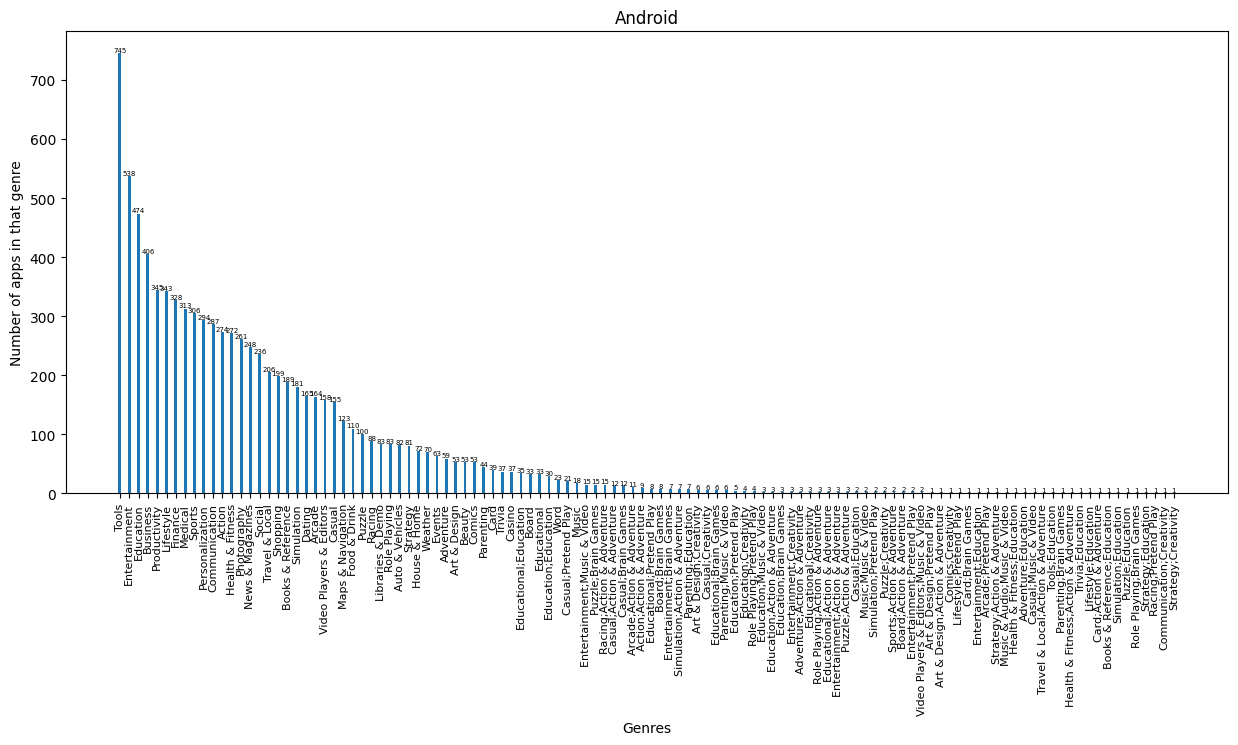

In [11]:
#android

#function for creating frequency dictionary for given dataset and collumn
def freq_table(dataset,index):
    freq_dic={}
    for app in dataset:
        genre=app[index]
        if genre in freq_dic:
            freq_dic[genre]+=1
        elif genre not in freq_dic:
            freq_dic[genre]=1
    return freq_dic


freq_dic=freq_table(free_android,9)

#sorting the dictionary
freq_dic = {k: v for k, v in sorted(freq_dic.items(), key=lambda item: item[1], reverse=True)}
#plotting frequnecy 






# plotting


def dic_bar_plot (freq_dic,bar_width=0.3,xlabel='Genres',ylabel='Number of apps in that genre',title='Android',labels_fontsize=5):
    import matplotlib.pyplot as plt
    #creating plot figure 
    figure_width = 15 
    figure_height = 6 
    plt.figure(figsize=(figure_width, figure_height))
    
    keys=list(freq_dic.keys())
    values=list(freq_dic.values())
    
    plt.bar(keys,values,width=bar_width)

    #rotating variable names and changing fontsize
    plt.xticks(rotation=90,fontsize=8)

    #adding values to bards
    x = range(len(values))
    for i, v in enumerate(freq_dic.values()):
        plt.text(x[i], v, str(v), ha='center', va='bottom',fontsize=labels_fontsize)
    #adding labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plot=plt.show()
    return plot


dic_bar_plot(freq_dic)



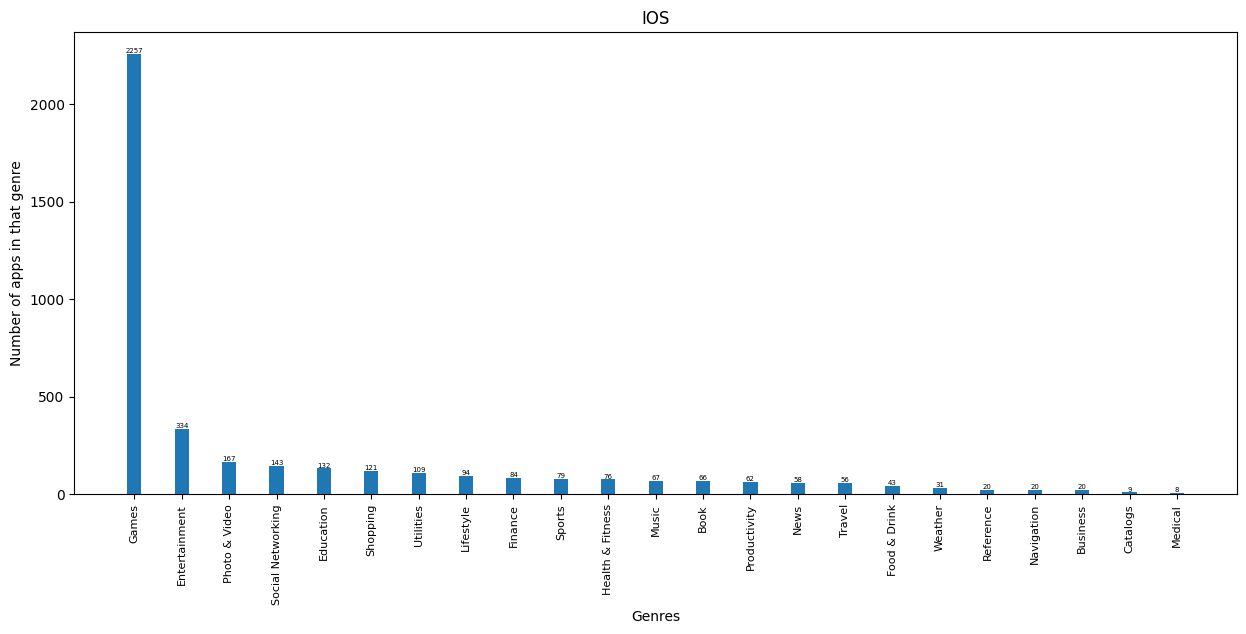

In [12]:
#ios
import matplotlib.pyplot as plt
#creating freq dictionary
freq_dic=freq_table(free_ios,11)

def dic_sort(dict,reverse_val=True):
    sorted_dict = {k: v for k, v in sorted(dict.items(), key=lambda item: item[1], reverse=reverse_val)}
    return sorted_dict

#sorting the dictionary
freq_dic = {k: v for k, v in sorted(freq_dic.items(), key=lambda item: item[1], reverse=True)}
#plotting frequnecy 


dic_bar_plot(freq_dic,title='IOS')
ios_freq_dic=freq_dic




as we can see from plots of genre frequency most common apps on andriod are tools and by far on ios are games, best of two worlds would be to use second one - app from entertainment category in order to create app which would fit both markets. if we want our app to start on android it would be wise to consider building tools app especialy related with photo and video as it is 3'rd most popular app type on ios.

Now we will continue to determine what apps has most users in order to acces popularity

{'Games': 42713023, 'Social Networking': 7590182, 'Photo & Video': 4550732, 'Music': 3784296, 'Entertainment': 3614869, 'Shopping': 2268348, 'Sports': 1590189, 'Utilities': 1527101, 'Health & Fitness': 1516376, 'Weather': 1463849, 'Reference': 1348958, 'Productivity': 1181341, 'Finance': 1135870, 'Travel': 1132097, 'News': 921778, 'Food & Drink': 867701, 'Lifestyle': 843961, 'Education': 827156, 'Book': 560890, 'Navigation': 519441, 'Business': 127356, 'Catalogs': 16016, 'Medical': 3678}


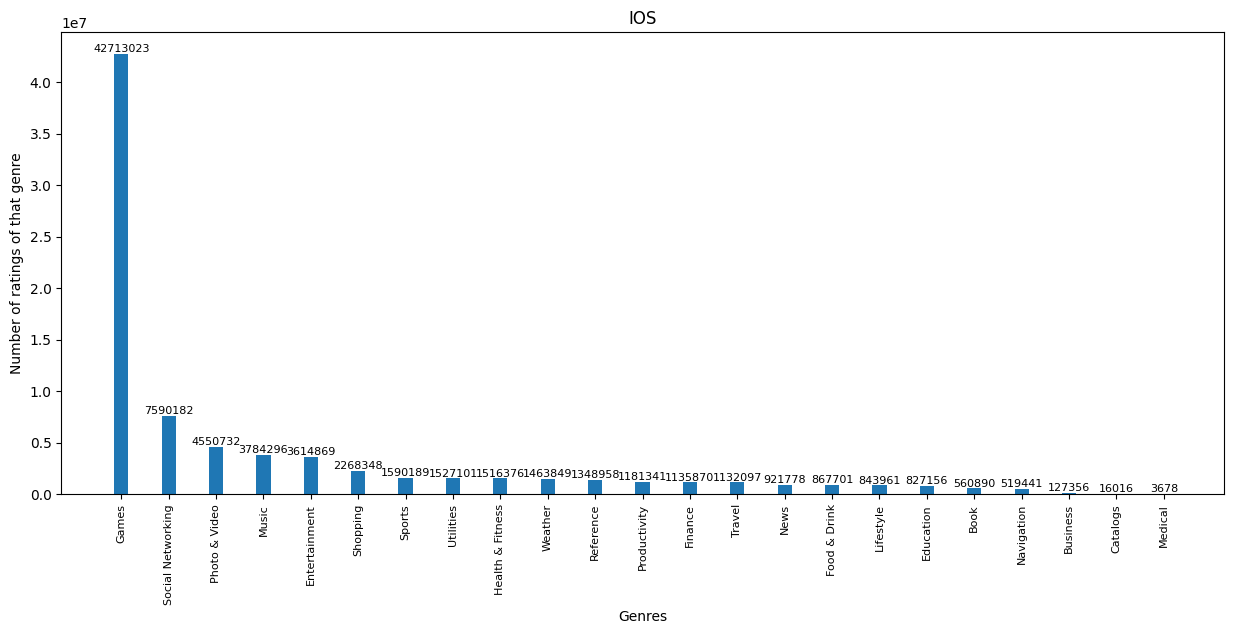

In [13]:
#ios

def user_count(dataset,genre_index,count_index):
    user_dic={}
    for app in dataset:
        genre = app[genre_index]
        rating_count=int(app[count_index])
        if genre in user_dic:
            user_dic[genre]+=rating_count
        elif genre not in user_dic:
            user_dic[genre]=rating_count
    return user_dic

user_dic=user_count(free_ios,11,5)
user_dic=dic_sort(user_dic)
print(user_dic)

dic_bar_plot(user_dic,ylabel='Number of ratings of that genre',title='IOS',labels_fontsize=8)


In [14]:
#android
#number conversion
free_android_conv=free_android
for app in free_android_conv:
    rating=app[5]
    rating=rating.replace('+','')
    rating=rating.replace(',','')
    rating=float(rating)
    app[5]=rating



{'Communication': 11037906191, 'Tools': 7990028474, 'Productivity': 5786629314, 'Social': 5487861902, 'Photography': 4647268815, 'Video Players & Editors': 3916831720, 'Arcade': 3758591940, 'Action': 3415986940, 'Casual': 3042798570, 'Entertainment': 3014302513, 'Travel & Local': 2894604086, 'News & Magazines': 2368196260, 'Books & Reference': 1665883760, 'Personalization': 1529235888, 'Sports': 1411180683, 'Shopping': 1400338585, 'Racing': 1400136820, 'Health & Fitness': 1133548402, 'Strategy': 907192105, 'Puzzle': 830286191, 'Business': 691902090, 'Simulation': 629062620, 'Maps & Navigation': 498060780, 'Lifestyle': 487478429, 'Finance': 455163132, 'Weather': 360188520, 'Role Playing': 329148570, 'Education': 256287900, 'Adventure': 245367120, 'Food & Drink': 211738751, 'Music': 170020500, 'Word': 169172550, 'Casual;Action & Adventure': 155000000, 'Casual;Pretend Play': 146100000, 'Education;Education': 142785510, 'Card': 142618500, 'Dating': 140914757, 'Puzzle;Brain Games': 13921000

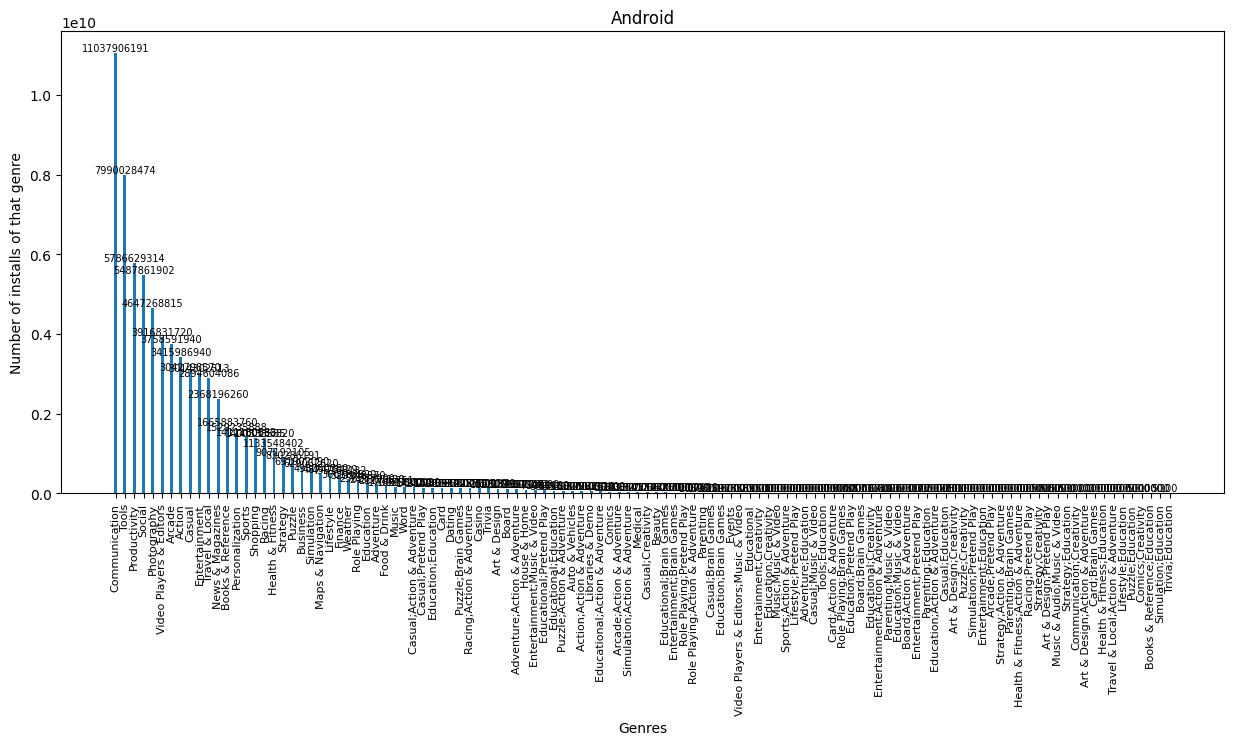

In [15]:

user_dic_android=user_count(free_android_conv,9,5)
user_dic_android=dic_sort(user_dic_android)
print(user_dic_android)
dic_bar_plot(user_dic_android,ylabel='Number of installs of that genre',title='Android',labels_fontsize=7)

As we can see from the plots for IOS number of users is coresponding to genre popularity with games as a genre with most users, regarding android situation changes becouse comunication apps are those with most users and most popular genre - tools are having much less users but are still in a fairly good spot regarding that analyss and primal question what app developer team should focus on it seems that best cchoice is comunication/social networking. High app count to user count ratio which is true for android comunication genre indicates that there might be potential market not flooded with apps already.
Now we will investigate further to find most popular apps on IOS and android and their user count in order to determine how does the distribution of apps in certain genres look like. we will look only at couple of most popular apps from some of more popular genres.

In [16]:
#creation of most poppular apps per genre
#function for extracting apps popularity and then sorts it and returns x first positions - x apps with most popularity
def app_pop(dataset,name_id,count_id,genre_id,x):
    apps_pop_list=[]
    for app in dataset: 
        name=app[name_id]
        count=int(app[count_id])
        genre=app[genre_id]
        apps_pop_list.append([genre,name,count])
    #sorting the list by 3rd parameter - user count
    apps_pop_list= sorted(apps_pop_list, key=lambda x: x[2], reverse=True)
    
    return apps_pop_list[:x]
    
ios_pop_list=app_pop(free_ios,1,5,11,4)

#now we have to apply that function for each genre



print(ios_pop_list)

[['Social Networking', 'Facebook', 2974676], ['Photo & Video', 'Instagram', 2161558], ['Games', 'Clash of Clans', 2130805], ['Games', 'Temple Run', 1724546]]


In [17]:
#ios

#we need list of lists that looks like this [[genre, app_name, user count],...]

#here we have list of sorted by popularity genres 
genre_list_ios=list(user_dic.keys())
# we iterate thru them and for each we choose most popular apps
for genre in genre_list_ios[:5]:
    genre_dataset=[]
    for app in free_ios:
        if app[11]==genre:
            genre_dataset.append(app)
    top5=app_pop(genre_dataset,1,5,11,5)
    print(top5)



[['Games', 'Clash of Clans', 2130805], ['Games', 'Temple Run', 1724546], ['Games', 'Candy Crush Saga', 961794], ['Games', 'Angry Birds', 824451], ['Games', 'Subway Surfers', 706110]]
[['Social Networking', 'Facebook', 2974676], ['Social Networking', 'Pinterest', 1061624], ['Social Networking', 'Skype for iPhone', 373519], ['Social Networking', 'Messenger', 351466], ['Social Networking', 'Tumblr', 334293]]
[['Photo & Video', 'Instagram', 2161558], ['Photo & Video', 'Snapchat', 323905], ['Photo & Video', 'YouTube - Watch Videos, Music, and Live Streams', 278166], ['Photo & Video', 'Pic Collage - Picture Editor & Photo Collage Maker', 123433], ['Photo & Video', 'Funimate video editor: add cool effects to videos', 123268]]
[['Music', 'Pandora - Music & Radio', 1126879], ['Music', 'Spotify Music', 878563], ['Music', 'Shazam - Discover music, artists, videos & lyrics', 402925], ['Music', 'iHeartRadio – Free Music & Radio Stations', 293228], ['Music', 'SoundCloud - Music & Audio', 135744]]
[[

As for ios we can see that in games category there are no clear winners but for social networkings a lot of users stick to most popular apps like instagram messanger or facebook , similar situation is with music but for entertainment apps we have much more diverse market where we could potentialy fit our app

In [18]:
#android
#we need list of lists that looks like this [[genre, app_name, user count],...]

#here we have list of sorted by popularity genres 
genre_list_android=list(user_dic_android.keys())
#print(genre_list_android)

# we iterate thru them and for each we choose most popular apps
for genre in genre_list_android[:5]:
    genre_dataset=[]
    for app in free_android:
        if app[9]==genre:
            genre_dataset.append(app)
    top10=app_pop(genre_dataset,0,5,9,10)
    
    print(top10)


[['Communication', 'Messenger – Text and Video Chat for Free', 1000000000], ['Communication', 'WhatsApp Messenger', 1000000000], ['Communication', 'Google Chrome: Fast & Secure', 1000000000], ['Communication', 'Gmail', 1000000000], ['Communication', 'Hangouts', 1000000000], ['Communication', 'Skype - free IM & video calls', 1000000000], ['Communication', 'Viber Messenger', 500000000], ['Communication', 'imo free video calls and chat', 500000000], ['Communication', 'Google Duo - High Quality Video Calls', 500000000], ['Communication', 'UC Browser - Fast Download Private & Secure', 500000000]]
[['Tools', 'Google', 1000000000], ['Tools', 'Google Translate', 500000000], ['Tools', 'SHAREit - Transfer & Share', 500000000], ['Tools', 'Gboard - the Google Keyboard', 500000000], ['Tools', 'Clean Master- Space Cleaner & Antivirus', 500000000], ['Tools', 'Security Master - Antivirus, VPN, AppLock, Booster', 500000000], ['Tools', 'Cache Cleaner-DU Speed Booster (booster & cleaner)', 100000000], ['

Similar situation is with android market where comunication, social and toools genres are already occupied but for the productivity genre we could find some space this indicates that we have to develop app in productivity/entertainment genres. Id suggest somethink like learning app with gamification features or app that helps with reading books by gamificating progress. 